### Информация
- *Автор*: Зитцер Данил
- *Дата*: вторник, 29 марта 2022 г., 11:47:50
- *Описание*: Блокнот для визуализации набора данных "ocr-test-cases"

#### Requirements

In [1]:
# !pip3 install opencv-python==4.4.0.46 pandas==1.2.4

In [2]:
import cv2
import pandas as pd


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv('/home/kirillk/datasets/OCR/ocr_act_1/test-cases-act.csv', index_col=0)

# data.loc[data['filename'] == '095.jpg', 'orientation'] = 'horizontal'

data.head()
# data.to_csv('../assets/test-cases.csv')

,filename,doc_type,doc_number,doc_date,scan_is_good,doc_type_box_left,doc_type_box_top,doc_type_box_width,doc_type_box_height,doc_number_box_left,doc_number_box_top,doc_number_box_width,doc_number_box_height,doc_date_box_left,doc_date_box_top,doc_date_box_width,doc_date_box_height
0,001.jpg,акт,6017103091,24.11.2021,True,0.026561,0.014445,0.023020,0.008174,0.066498,0.013455,0.071328,0.010155,0.156660,0.013331,0.065398,0.009536
1,002.jpg,акт,6600174850,12.10.2021,True,0.037938,0.035595,0.023487,0.007534,0.079714,0.034500,0.072964,0.008492,0.172122,0.034500,0.065841,0.008766
2,003.jpg,акт,6600226583,07.12.2021,True,0.070513,0.037068,0.023613,0.008848,0.111159,0.036792,0.073161,0.008709,0.202126,0.036239,0.065419,0.009401
3,004.jpg,акт,6600236611,17.12.2021,True,0.033116,0.045036,0.023148,0.008422,0.073842,0.045036,0.071531,0.008422,0.164170,0.044789,0.065962,0.008669
4,005.jpg,акт,6600241100,22.12.2021,True,0.039245,0.047049,0.023848,0.007750,0.080277,0.047049,0.072069,0.007625,0.170582,0.046799,0.066808,0.008125


In [4]:
data.loc[data['filename'] == '095.jpg', 'orientation']

95    horizontal
Name: orientation, dtype: object

In [64]:
h = data.query('orientation == "horizontal"')

## Исследование по вычислениям регионов

### Расположение типа документа

In [107]:
delta_y_type = (h['doc_type_box_top'] - h['barcode_box_height'] - h['barcode_box_top'])
delta_y_type.describe()['min']

0.22563780398531555

In [108]:
delta_x_type = (h['doc_type_box_left'] - h['barcode_box_width'] - h['barcode_box_left'])
delta_x_type.describe()['min']

0.0992509083153375

In [109]:
height_type = delta_y_type.describe()['max'] - delta_y_type.describe()['min'] + h['doc_type_box_height'].describe()['max']
height_type

0.060846927820421025

In [110]:
width_type = delta_x_type.describe()['max'] - delta_x_type.describe()['min'] + h['doc_type_box_width'].describe()['max']
width_type

0.15830705762258668

### Расположение номера документа

In [111]:
delta_y_number = (h['doc_number_box_top'] - h['barcode_box_height'] - h['barcode_box_top'])
delta_y_number.describe()['min']

0.23019614345976638

In [112]:
delta_x_number = (h['doc_number_box_left'] - h['barcode_box_width'] - h['barcode_box_left'])
delta_x_number.describe()['min']

0.2499945210478843

In [113]:
height_number = delta_y_number.describe()['max'] - delta_y_number.describe()['min'] + h['doc_number_box_height'].describe()['max']
height_number

0.05236081804739489

In [114]:
width_number = delta_x_number.describe()['max'] - delta_x_number.describe()['min'] + h['doc_number_box_width'].describe()['max']
width_number

0.09546865830208186

### Дефолтные значения для типа и номера документа

In [52]:
h['doc_type_box_left'].describe()['min']

0.2615082611492085

In [53]:
h['doc_type_box_left'].max() - h['doc_type_box_left'].min() + h['doc_type_box_width'].max()

0.1977487494775241

In [54]:
h['doc_type_box_top'].describe()['min']

0.1079090372280077

In [55]:
h['doc_type_box_top'].max() - h['doc_type_box_top'].min() + h['doc_type_box_height'].max()

0.555220072277551

In [60]:
h['doc_number_box_left'].describe()['min']

0.4132300289433828

In [61]:
h['doc_number_box_left'].max() - h['doc_number_box_left'].min() + h['doc_number_box_width'].max()

0.10281920525254018

In [65]:
h['doc_number_box_top'].describe()['min']

0.330225801737797

In [66]:
h['doc_number_box_top'].max() - h['doc_number_box_top'].min() + h['doc_number_box_height'].max()

0.06336797661919122

(203, 17)
(100, 17)


<AxesSubplot:ylabel='Frequency'>

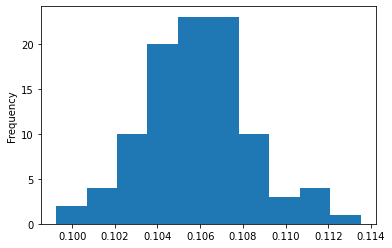

In [7]:
print(data.shape)
print(h.shape)

(h['barcode_box_left'] + h['barcode_box_width'] - h['doc_type_box_left']).abs().plot(kind='hist')

In [ ]:
for index, row in data.query('orientation == "vertical"').iterrows():
    image = cv2.imread('/srv/datasets/ocr/test-cases/' + row['filename'])
    if image.shape[0] < image.shape[1]:
        print(row['filename'], image.shape)

In [6]:
mapping_prefix_value = {
    'barcode_box_': 'barcode_number',
    'doc_type_box_': None,
    'doc_number_box_': 'doc_number',
}

for index, row in data.query('filename == "095.jpg"').iterrows():
    image = cv2.imread('/srv/datasets/ocr/test-cases/' + row['filename'])
    image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    height, width, _ = image.shape
    
    for prefix, value in mapping_prefix_value.items():
        x1 = int(row[prefix + 'left'] * width)
        y1 = int(row[prefix + 'top'] * height)
        x2 = int((row[prefix + 'left'] + row[prefix + 'width']) * width)
        y2 = int((row[prefix + 'top'] + row[prefix + 'height']) * height)
    
        image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 4)
        image = cv2.putText(image, row.get(value, default=''), (x1, y2 + 50), 0, 2, (0, 0, 255), 3)
        
    cv2.imshow('Document', image)
    
    key = cv2.waitKey(10000) & 0xFF

    if key == ord('q'):
        break
    
cv2.destroyAllWindows()